Sample code for AIRI400 Perceptron class. The original code comes from Sebastian Reschka's blog (http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html).<br/>
Slightly modified for the lecture. -skimaza

In [5]:
import numpy as np

In [16]:
weights = []
errors_log = []
epochs = 50
eta = 0.01

IRIS_DATA = "iris.dat"

In [11]:
import pandas as pd

In [9]:
import os

In [14]:
from urllib.request import urlopen

In [20]:
if not os.path.exists(IRIS_DATA):
    raw = urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data').read()
    with open(IRIS_DATA, "wb") as f:
        f.write(raw)

In [21]:
df = pd.read_csv(IRIS_DATA, header=None)

In [22]:
# setosa and versicolor
y = np.asarray(df.iloc[0:100, 4].values)
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = np.asarray(df.iloc[0:100, [0,2]].values)

In [23]:
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


In [24]:
print(X)

[[ 5.1  1.4]
 [ 4.9  1.4]
 [ 4.7  1.3]
 [ 4.6  1.5]
 [ 5.   1.4]
 [ 5.4  1.7]
 [ 4.6  1.4]
 [ 5.   1.5]
 [ 4.4  1.4]
 [ 4.9  1.5]
 [ 5.4  1.5]
 [ 4.8  1.6]
 [ 4.8  1.4]
 [ 4.3  1.1]
 [ 5.8  1.2]
 [ 5.7  1.5]
 [ 5.4  1.3]
 [ 5.1  1.4]
 [ 5.7  1.7]
 [ 5.1  1.5]
 [ 5.4  1.7]
 [ 5.1  1.5]
 [ 4.6  1. ]
 [ 5.1  1.7]
 [ 4.8  1.9]
 [ 5.   1.6]
 [ 5.   1.6]
 [ 5.2  1.5]
 [ 5.2  1.4]
 [ 4.7  1.6]
 [ 4.8  1.6]
 [ 5.4  1.5]
 [ 5.2  1.5]
 [ 5.5  1.4]
 [ 4.9  1.5]
 [ 5.   1.2]
 [ 5.5  1.3]
 [ 4.9  1.5]
 [ 4.4  1.3]
 [ 5.1  1.5]
 [ 5.   1.3]
 [ 4.5  1.3]
 [ 4.4  1.3]
 [ 5.   1.6]
 [ 5.1  1.9]
 [ 4.8  1.4]
 [ 5.1  1.6]
 [ 4.6  1.4]
 [ 5.3  1.5]
 [ 5.   1.4]
 [ 7.   4.7]
 [ 6.4  4.5]
 [ 6.9  4.9]
 [ 5.5  4. ]
 [ 6.5  4.6]
 [ 5.7  4.5]
 [ 6.3  4.7]
 [ 4.9  3.3]
 [ 6.6  4.6]
 [ 5.2  3.9]
 [ 5.   3.5]
 [ 5.9  4.2]
 [ 6.   4. ]
 [ 6.1  4.7]
 [ 5.6  3.6]
 [ 6.7  4.4]
 [ 5.6  4.5]
 [ 5.8  4.1]
 [ 6.2  4.5]
 [ 5.6  3.9]
 [ 5.9  4.8]
 [ 6.1  4. ]
 [ 6.3  4.9]
 [ 6.1  4.7]
 [ 6.4  4.3]
 [ 6.6  4.4]
 [ 6.8  4.8]

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

# Versicolor
pos = X[[y == 1]]
# Setosa
neg = X[[y == -1]]

In [28]:
print(pos)

[[ 7.   4.7]
 [ 6.4  4.5]
 [ 6.9  4.9]
 [ 5.5  4. ]
 [ 6.5  4.6]
 [ 5.7  4.5]
 [ 6.3  4.7]
 [ 4.9  3.3]
 [ 6.6  4.6]
 [ 5.2  3.9]
 [ 5.   3.5]
 [ 5.9  4.2]
 [ 6.   4. ]
 [ 6.1  4.7]
 [ 5.6  3.6]
 [ 6.7  4.4]
 [ 5.6  4.5]
 [ 5.8  4.1]
 [ 6.2  4.5]
 [ 5.6  3.9]
 [ 5.9  4.8]
 [ 6.1  4. ]
 [ 6.3  4.9]
 [ 6.1  4.7]
 [ 6.4  4.3]
 [ 6.6  4.4]
 [ 6.8  4.8]
 [ 6.7  5. ]
 [ 6.   4.5]
 [ 5.7  3.5]
 [ 5.5  3.8]
 [ 5.5  3.7]
 [ 5.8  3.9]
 [ 6.   5.1]
 [ 5.4  4.5]
 [ 6.   4.5]
 [ 6.7  4.7]
 [ 6.3  4.4]
 [ 5.6  4.1]
 [ 5.5  4. ]
 [ 5.5  4.4]
 [ 6.1  4.6]
 [ 5.8  4. ]
 [ 5.   3.3]
 [ 5.6  4.2]
 [ 5.7  4.2]
 [ 5.7  4.2]
 [ 6.2  4.3]
 [ 5.1  3. ]
 [ 5.7  4.1]]


In [29]:
print(neg)

[[ 5.1  1.4]
 [ 4.9  1.4]
 [ 4.7  1.3]
 [ 4.6  1.5]
 [ 5.   1.4]
 [ 5.4  1.7]
 [ 4.6  1.4]
 [ 5.   1.5]
 [ 4.4  1.4]
 [ 4.9  1.5]
 [ 5.4  1.5]
 [ 4.8  1.6]
 [ 4.8  1.4]
 [ 4.3  1.1]
 [ 5.8  1.2]
 [ 5.7  1.5]
 [ 5.4  1.3]
 [ 5.1  1.4]
 [ 5.7  1.7]
 [ 5.1  1.5]
 [ 5.4  1.7]
 [ 5.1  1.5]
 [ 4.6  1. ]
 [ 5.1  1.7]
 [ 4.8  1.9]
 [ 5.   1.6]
 [ 5.   1.6]
 [ 5.2  1.5]
 [ 5.2  1.4]
 [ 4.7  1.6]
 [ 4.8  1.6]
 [ 5.4  1.5]
 [ 5.2  1.5]
 [ 5.5  1.4]
 [ 4.9  1.5]
 [ 5.   1.2]
 [ 5.5  1.3]
 [ 4.9  1.5]
 [ 4.4  1.3]
 [ 5.1  1.5]
 [ 5.   1.3]
 [ 4.5  1.3]
 [ 4.4  1.3]
 [ 5.   1.6]
 [ 5.1  1.9]
 [ 4.8  1.4]
 [ 5.1  1.6]
 [ 4.6  1.4]
 [ 5.3  1.5]
 [ 5.   1.4]]


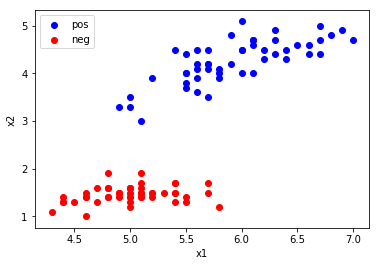

In [30]:
# versicolor with blue dots and setosa with red dots
plt.scatter(pos[:,0], pos[:, 1], color='blue', label="pos")
plt.scatter(neg[:,0], neg[:, 1], color='red', label="neg")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=2, scatterpoints=1, fontsize=10)

In [31]:
def train(X, y, epochs=epochs, eta=eta):
    global weights
    global errors_log
    weights = np.zeros(1 + X.shape[1])
    print("Initial weights", weights)
    errors_log = []

    for i in range(epochs):
        errors = 0
        print("EPOCHS", i+1)
        for xi, target in zip(X, y):
            update = eta * (target - predict(xi))
            print(xi, "target", target, "sum", net_input(xi), "update", update)
            if update != 0:
                weights[1:] +=  update * xi
                weights[0] +=  update
                print("Updated WEIGHTS", weights)
                errors += int(update != 0.0)
        errors_log.append(errors)
    return

def net_input(X):
    global weights
    return np.dot(X, weights[1:]) + weights[0]

def predict(X):
    return np.where(net_input(X) > 0.0, 1, -1)

In [32]:
train(X, y)

Initial weights [ 0.  0.  0.]
EPOCHS 1
[ 5.1  1.4] target -1 sum 0.0 update 0.0
[ 4.9  1.4] target -1 sum 0.0 update 0.0
[ 4.7  1.3] target -1 sum 0.0 update 0.0
[ 4.6  1.5] target -1 sum 0.0 update 0.0
[ 5.   1.4] target -1 sum 0.0 update 0.0
[ 5.4  1.7] target -1 sum 0.0 update 0.0
[ 4.6  1.4] target -1 sum 0.0 update 0.0
[ 5.   1.5] target -1 sum 0.0 update 0.0
[ 4.4  1.4] target -1 sum 0.0 update 0.0
[ 4.9  1.5] target -1 sum 0.0 update 0.0
[ 5.4  1.5] target -1 sum 0.0 update 0.0
[ 4.8  1.6] target -1 sum 0.0 update 0.0
[ 4.8  1.4] target -1 sum 0.0 update 0.0
[ 4.3  1.1] target -1 sum 0.0 update 0.0
[ 5.8  1.2] target -1 sum 0.0 update 0.0
[ 5.7  1.5] target -1 sum 0.0 update 0.0
[ 5.4  1.3] target -1 sum 0.0 update 0.0
[ 5.1  1.4] target -1 sum 0.0 update 0.0
[ 5.7  1.7] target -1 sum 0.0 update 0.0
[ 5.1  1.5] target -1 sum 0.0 update 0.0
[ 5.4  1.7] target -1 sum 0.0 update 0.0
[ 5.1  1.5] target -1 sum 0.0 update 0.0
[ 4.6  1. ] target -1 sum 0.0 update 0.0
[ 5.1  1.7] target

In [33]:
print(errors_log)

[1, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [35]:
print(weights)

[-0.04  -0.07   0.184]


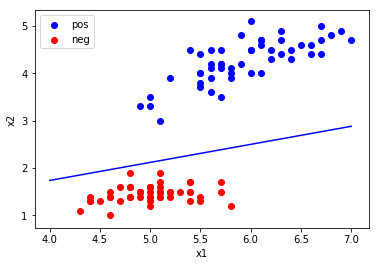

In [39]:

fig = plt.figure()
ax = fig.add_subplot(111)

# draw between 4 and 7 of x1
point_x = np.array([4, 7])
# x2 = -(w0 + w1 * x1) / w2
point_y = np.array([- (weights[0] + weights[1] * 4) / weights[2], - (weights[0] + weights[1] * 7) / weights[2]])
line, = ax.plot(point_x, point_y, 'b-', picker=5)

ax.scatter(pos[:,0], pos[:, 1], color='blue', label="pos")
ax.scatter(neg[:,0], neg[:, 1], color='red', label="neg")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=2, scatterpoints=1, fontsize=10)

plt.show()

In [40]:
gradient = - weights[1] / weights[2]
y_intercept = - weights[0] / weights[2]
print(gradient, y_intercept)

0.380434782609 0.217391304348
